# Internship/Professional Practice
### By Amogh R

The idea behind this project is to predict the **Chance of Admit** during filing an application for Masters Degree. Some of the important parameters that are considered during this process are:
1. GRE Score
2. TOEFL Score
3. CGPA
4. University rating
5. Research Experience
6. Statement of purpose

So to predict the **Chance of Admit**, we will be building the following **Machine Learning Models**:
1. Random Forest Regressor
2. Random Forest Regressor after Removing the Outliers

Then, we will plot:
1. The actual and predicted values.
2. The most significant features against prediction.

**After this process, we will come to an inference about which model is the best for our purpose!**

For this, we will calculate _Mean Squared Error(MSE), Root Mean Squared Error(RMSE) and Coefficient of Determination(R Squared)_. We will consider the model with **minimum MSE, minimum RMSE and maximum R-Squared values.**

**MSE** is calculated by taking the average of the square of the difference between the original and predicted values of the data.

**RMSE** is the standard deviation of the errors which occur when a prediction is made on a dataset. This is the same as MSE (Mean Squared Error) but the root of the value is considered while determining the accuracy of the model.

**R Squared** metric gives an indication of how good a model fits a given dataset. It indicates how close the regression line (i.e the predicted values plotted) is to the actual data values. The R squared value lies between 0 and 1 where 0 indicates that this model doesn't fit the given data and 1 indicates that the model fits perfectly to the dataset provided.

We calculate another metric, called **Classification Accuracy**. It is the number of correct predictions made as a ratio of all predictions made.

# Index
#### DATA PREPROCESSING 
#### RANDOM FOREST REGRESSION
#### RFR1
#### RFR2: Eliminating the Outliers
#### INFERENCE

## DATA PREPROCESSING

Pre-processing refers to the transformations applied to our data before feeding it to the algorithm. 
**Data Preprocessing** is a technique that is used to convert the raw data into a clean data set. In other words, whenever the data is gathered from different sources it is collected in raw format which is not feasible for the analysis.

Need of Data Preprocessing:
1. Some specified Machine Learning model needs information in a specified format, for example, _Random Forest_ algorithm does not support null values, therefore to execute random forest algorithm null values have to be managed from the original raw data set.
2. Another aspect is that data set should be formatted in such a way that more than one Machine Learning and _Deep Learning_ algorithms are executed in one data set, and best out of them is chosen.

In [1]:
# IMPORTING ALL THE MODULES REQUIRED FOR THE PROJECT
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(style='whitegrid', color_codes=True)
import matplotlib.pyplot as plt
import statsmodels.regression.linear_model as sm
import warnings
from matplotlib import cm
from mpl_toolkits import mplot3d
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# READING THE DATASET AS DATAFRAMES
df = pd.read_csv("AdmissionData.csv")
# PRINTNG SOME OF THE ROWS OF THE DATASET
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
# COMPUTING THE SUMMARY OF STATISTICS PERTAINING TO THE DATAFRAME COLUMNS
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [4]:
# DISCARDING THE SERIAL NO. COLUMN AS WE DO NOT CONSIDER IT AS A FEATURE
df.drop(['Serial No.'],axis=1,inplace=True)

# DATAPREPROCESSING
targets = df['Chance of Admit']
features = df.drop(columns = {'Chance of Admit'})

X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=42)

# NORMALISING THE DATA WITHIN THE REQUIRED TEST AND TRAIN RANGES
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

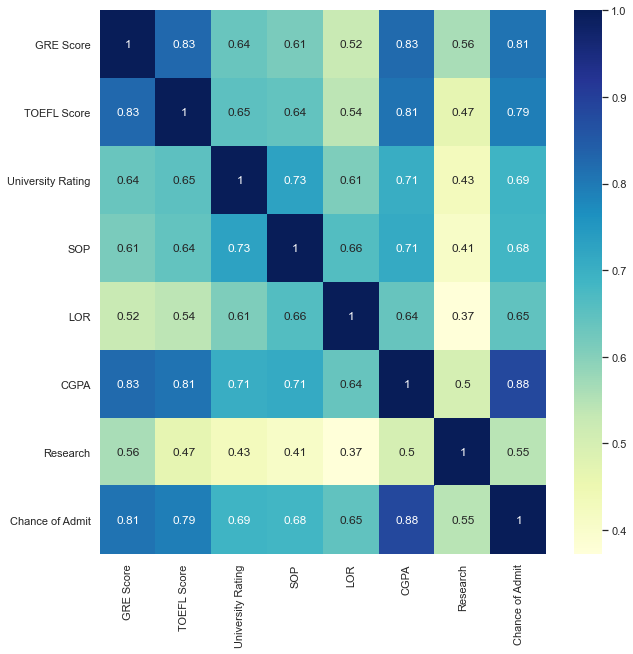

In [5]:
# A TWO-DIMENSIONAL HEATMAP, WHERE INDIVIDUAL VALUES IN EACH MATRIX ARE REPRESENTED
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu');

/Users/amoghr/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


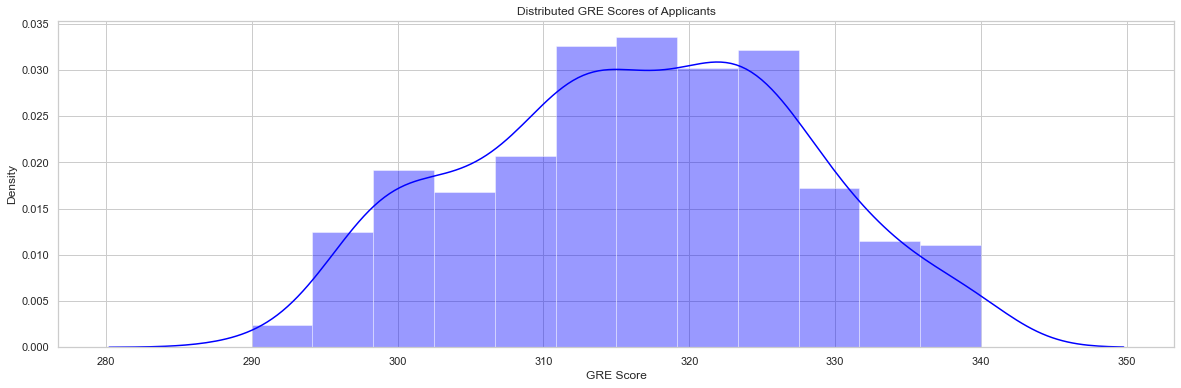

In [6]:
# DISTRIBUTION OF THE GRE MARKS AND THE NUMBER OF STUDENTS WHO HAVE SCORED THOSE MANY MARKS WITH HISTOGRAM
plt.figure(figsize=(20,6))
sns.distplot(df['GRE Score'], color="blue")
plt.title('Distributed GRE Scores of Applicants');

/Users/amoghr/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


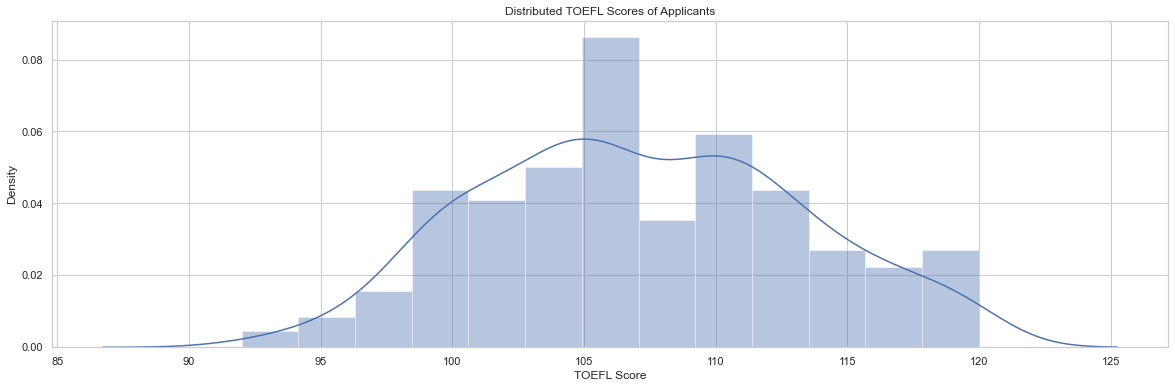

In [7]:
# DISTRIBUTION OF THE TOEFL MARKS AND THE NUMBER OF STUDENTS WHO HAVE SCORED THOSE MANY MARKS WITH HISTOGRAM
plt.figure(figsize=(20,6))
sns.distplot(df['TOEFL Score'])
plt.title('Distributed TOEFL Scores of Applicants');

/Users/amoghr/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


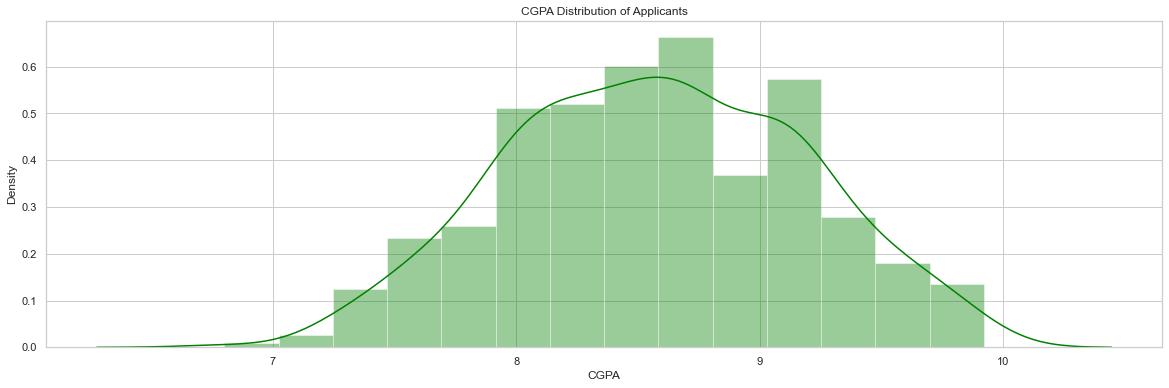

In [8]:
# DISTRIBUTION OF THE CGPA AND THE NUMBER OF STUDENTS WHO HAVE SCORED THAT CGPA WITH HISTOGRAM
plt.figure(figsize=(20,6))
sns.distplot(df['CGPA'], color="green")
plt.title('CGPA Distribution of Applicants');

/Users/amoghr/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


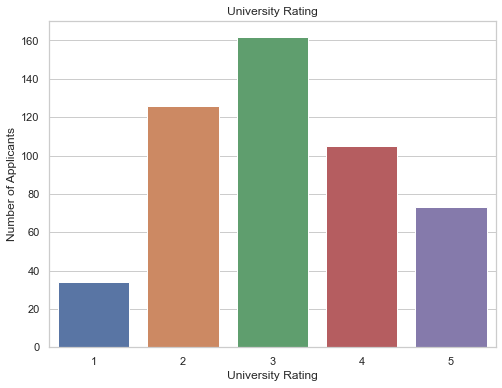

In [9]:
# VISUALISING THE UNIVERSITY RATING OF DIFFERENT STUDENTS 
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(df['University Rating'])
plt.title('University Rating')
plt.ylabel('Number of Applicants');

/Users/amoghr/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


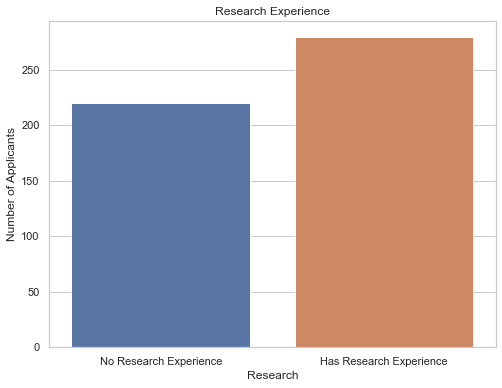

In [10]:
# VISUALISING HOW MANY STUDENTS HAVE RESEARCH EXPERIENCE 
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(df['Research'])
plt.title('Research Experience')
plt.ylabel('Number of Applicants')
ax.set_xticklabels(['No Research Experience', 'Has Research Experience']);

## RANDOM FOREST REGRESSION

Every decision tree has high variance, but when we combine all of them together in parallel then the resultant variance is low as each decision tree gets perfectly trained on that particular sample data and hence the output doesn’t depend on one decision tree but multiple decision trees.

**Random Forest(RFR)** is a _Supervised Learning Algorithm_ which uses ensemble learning method for classification and regression. A random forest is a meta-estimator (i.e. it combines the result of multiple predictions) which aggregates many decision trees, with some helpful modifications:
1. The number of features that can be split on at each node is limited to some percentage of the total (which is known as the hyperparameter). This ensures that the ensemble model does not rely too heavily on any individual feature, and makes fair use of all potentially predictive features.
2. Each tree draws a random sample from the original data set when generating its splits, adding a further element of randomness that prevents overfitting.

The above modifications help prevent the trees from being too highly correlated.

In this project, we have 4 different RFR models, they are:
1. Random Forest Regression- _RFR1_
2. Random Forest Regression after Eliminating the Outliers- _RFR2_

**Outliers** in input data can skew and mislead the training process of machine learning algorithms resulting in longer training times, less accurate models and ultimately poorer results. Outliers can skew the summary distribution of attribute values in descriptive statistics like mean and standard deviation and in plots such as histograms and scatterplots, compressing the body of the data.

## RFR1

In [11]:
# DATA PREPROCESSING
df = pd.read_csv("AdmissionData.csv")

# DISCARDING THE SERIAL NO. COLUMN AS WE DO NOT CONSIDER IT AS A FEATURE
df.drop(['Serial No.'],axis=1,inplace=True)

targets = df['Chance of Admit']
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=42)

# NORMALISING THE DATA WITHIN THE REQUIRED TEST AND TRAIN RANGES
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [12]:
# FITTING RANDOM FOREST REGRESSION TO THE TRAINING SET
forest = RandomForestRegressor(n_estimators=110,max_depth=6,random_state=0)
forest.fit(X_train, y_train)
y_predict = forest.predict(X_test)

In [13]:
# PRINTING THE MOST SIGNIFICANT FEATURES AGAINST PREDICTION
importance = (sorted(zip(map(lambda x: round(x, 4), forest.feature_importances_), features), reverse=True))
for _ in importance:
    print (_)

(0.7717, 'CGPA')
(0.1461, 'GRE Score')
(0.0279, 'TOEFL Score')
(0.019, 'SOP')
(0.0167, 'LOR')
(0.0094, 'University Rating')
(0.0092, 'Research')


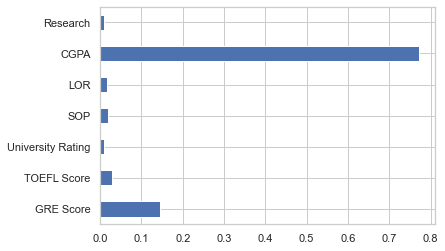

In [14]:
# VISUALISING THE MOST SIGNIFICANT FEATURES AGAINST PREDICTION
f_imp = pd.Series(forest.feature_importances_, index = features.columns)
f_imp.plot(kind = 'barh')
plt.show()

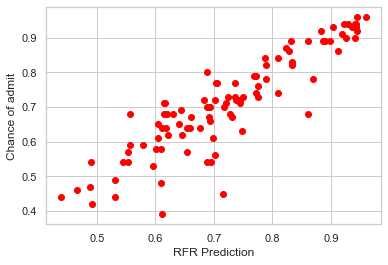

In [15]:
# PLOTTING THE ACTUAL AND PREDICTED VALUES
plt.xlabel('RFR Prediction')
plt.ylabel('Chance of admit')
#plt.plot(pred,y_test,color='blue');
plt.scatter(y_predict, y_test,color='red');

In [16]:
# CALCULATING AND PRINTING MSE, RMSE AND R SQUARED VALUES
rfr1_mse = mean_squared_error(y_test, y_predict)
rfr1_rmse = np.sqrt(mean_squared_error(y_test, y_predict))
rfr1_rs = r2_score(y_test, y_predict)

print("Squared Mean Error= ", rfr1_mse)
print("Root Squared Mean Error= ", rfr1_rmse)
print("Coefficient of Determination= ", rfr1_rs)

Squared Mean Error=  0.004136606354984886
Root Squared Mean Error=  0.06431645477624592
Coefficient of Determination=  0.7977209606364359


## RFR2: Eliminating the Outliers

In [17]:
# DATA PREPROCESSING
df = pd.read_csv("AdmissionData.csv")

# DISCARDING THE SERIAL NO. COLUMN AS WE DO NOT CONSIDER IT AS A FEATURE
df.drop(['Serial No.'],axis=1,inplace=True)

col_names=df.columns.tolist()
var=df.columns.values.tolist()
y=df['Chance of Admit']
x=[i for i in var if i not in ['Chance of Admit']]
x=df[x]

In [18]:
# NORMALISING THE DATA WITHIN THE REQUIRED TEST AND TRAIN RANGES
x_train, x_test, y_train, y_test = train_test_split(x, y ,test_size=0.2 , random_state=0)
xs = StandardScaler()
x_train = xs.fit_transform(x_train)
x_test = xs.transform(x_test)
warnings.warn(" ")

/Users/amoghr/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning:  
  


In [19]:
# REMOVING THE OUTLIERS
cy_train=[1 if chance > 0.75 else 0 for chance in y_train]
cy_train=np.array(cy_train)

cy_test=[1 if chance > 0.75 else 0 for chance in y_test]
cy_test=np.array(cy_test)

In [20]:
# FITTING RANDOM FOREST REGRESSION TO THE TRAINING SET
rf = RandomForestRegressor()
rf.fit(x_train, cy_train)
pred = rf.predict(x_test)

In [21]:
# PRINTING THE MOST SIGNIFICANT FEATURES
f_imp=pd.Series(rf.feature_importances_,index = features.columns)
print(f_imp)

GRE Score            0.170258
TOEFL Score          0.062810
University Rating    0.020978
SOP                  0.042703
LOR                  0.045081
CGPA                 0.644529
Research             0.013641
dtype: float64


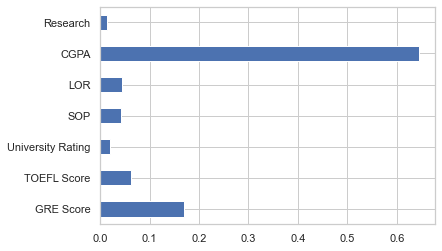

In [22]:
# VISUALISING THE MOST SIGNIFICANT FEATURES AGAINST PREDICTION 
f_imp = pd.Series(rf.feature_importances_, index = features.columns)
f_imp.plot(kind = 'barh')
plt.show()

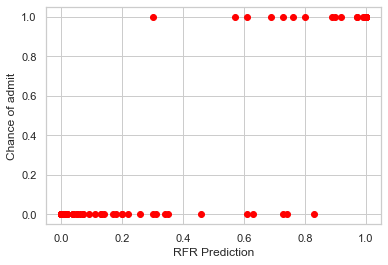

In [23]:
# PLOTTING THE ACTUAL AND PREDICTED VALUES
plt.xlabel('RFR Prediction')
plt.ylabel('Chance of admit')
plt.scatter(rf.predict(x_test), cy_test,color='red');

In [24]:
# CALCULATING AND PRINTING MSE, RMSE AND R SQUARED VALUES
rfr2_mse = mean_squared_error(cy_test, pred)
rfr2_rmse = np.sqrt(mean_squared_error(cy_test, pred))
rfr2_rs = r2_score(cy_test, pred)

print("Squared Mean Error= ", rfr2_mse)
print("Root Squared Mean Error= ", rfr2_rmse)
print("Coefficient of Determination= ", rfr2_rs)

Squared Mean Error=  0.046557
Root Squared Mean Error=  0.21577071163621814
Coefficient of Determination=  0.7894301221166893


# INFERENCE
### Now we will take a look at MSE, RMSE and R Squared values of the models

#### RFR1

In [25]:
print("MSE = ", rfr1_mse)
print("RMSE = ", rfr1_rmse)
print("RS = ", rfr1_rs)

MSE =  0.004136606354984886
RMSE =  0.06431645477624592
RS =  0.7977209606364359


#### RFR2: Eliminating the Outliers

In [26]:
print("MSE = ", rfr2_mse)
print("RMSE = ", rfr2_rmse)
print("RS = ", rfr2_rs)

MSE =  0.046557
RMSE =  0.21577071163621814
RS =  0.7894301221166893


/Users/amoghr/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


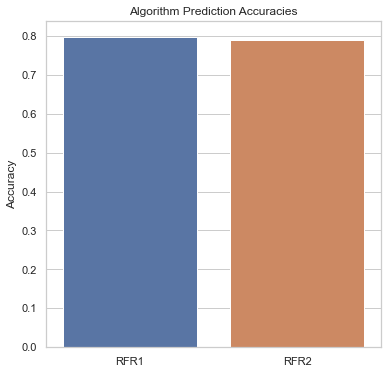

In [27]:
# VISUALISING THE R-SQUARED VALUES OF ALL THE MODELS
Models = ['RFR1', 'RFR2']
Scores = np.array([rfr1_rs, rfr2_rs])

fig, ax = plt.subplots(figsize=(6,6))
plt.title('Algorithm Prediction Accuracies')
plt.ylabel('Accuracy')
sns.barplot(Models, Scores);

#### For obtaining the best model for our purpose, we will consider the model with minimum MSE, minimum RMSE and maximum R-Squared values.
We see that **RFR1: All-In Method** has the least MSE and RMSE values, and maximum R Squared values. Hence we conclude that this model is the best for our purpose, considering this dataset!

In [28]:
print("The classification metrics of our best model is:")
print("MSE = ", rfr1_mse)
print("RMSE = ", rfr1_rmse)
print("RS = ", rfr1_rs)

The classification metrics of our best model is:
MSE =  0.004136606354984886
RMSE =  0.06431645477624592
RS =  0.7977209606364359
